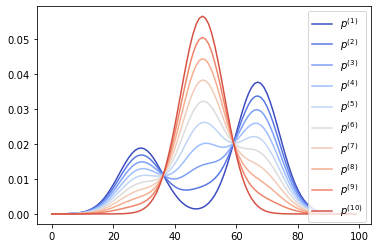

C:\anaconda\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


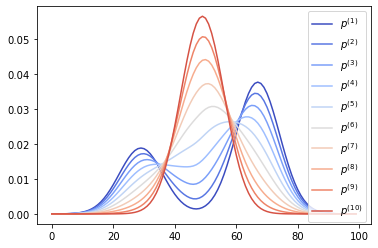

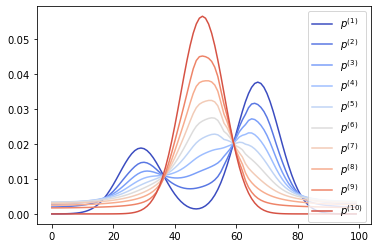

In [3]:
import cvxpy as cp
from morphing_data import *
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib import cm


coolwarm = cm.get_cmap("coolwarm")
colors = [coolwarm(i) for i in np.linspace(0, 0.9, N)]

# distance functions
functions = [
    lambda a,b : cp.sum_squares(a - b),
    lambda a,b : -cp.sum([cp.geo_mean(cp.vstack([a[i], b[i]])) for i in range(n)]),
    lambda a,b : cp.max(cp.vstack([cp.abs(cp.sum(a[:i] - b[:i])) for i in range(1,n)])),
    ]
for d in functions:
    p = cp.Variable((n, N), nonneg=True)
    obj = cp.Minimize(cp.sum([d(p[:, i], p[:, i+1]) for i in range(N-1)]))
    prob = cp.Problem(obj, [p[:, 0] == q, p[:, -1] == r, p.T@np.ones(n) == np.ones(N)])
    prob.solve(solver="ECOS")
    p = p.value
    for i in range(N):
        plt.plot(p[:, i], label="$p^{(%d)}$"%(i+1), color=colors[i])
        plt.legend()
    plt.show()